---
---
#**MANIPULACIÓN DE DATOS**

Docente: Paulette N. Reyes Baeza

<img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width=3%>   [Github](https://github.com/paulette-reyes)

---
---
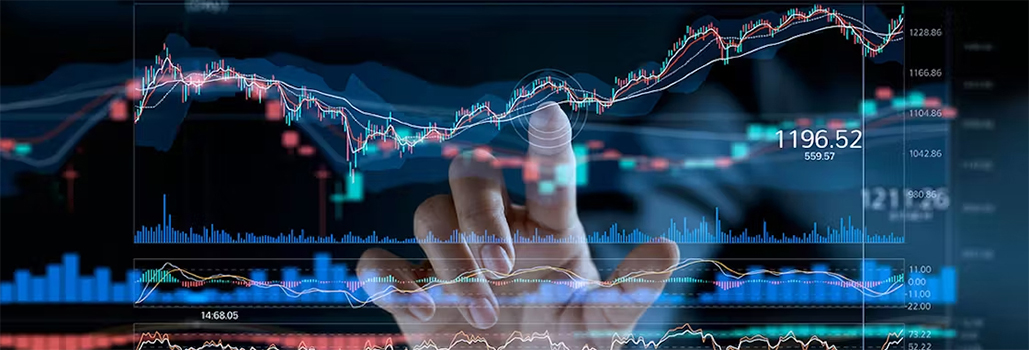

#**1. ENTENDIMIENTO DEL PROBLEMA**

**CONTEXTO DEL CASO:**

El conjunto de datos fue descargado de una base de datos de clientes que contiene todas las facturas realizadas por una empresa el año 2022.

**Objetivo:**

>El gerente necesita un resumen de los datos con el fin de descubrir información relevante para la empresa, pero los datos presentan errores de registro que es necesario resolver antes de hacer el análisis.

**DESARROLLO:**

➡️ Identifique problemas de registro, datos nulos y atípicos.

➡️ Realice una rutina de limpieza, imputación y transformación de los datos.

➡️ Realice un análisis estadístico del conjunto de datos entregado por la empresa.

➡️ Interprete cada tabla y gráfico.

##**Pre-procesamiento**

Importar librerías básicas

In [1]:
# OPERACIONES CON ARREGLOS (MATRICES Y VECTORES)
import numpy as np

# ESTRUCTURA Y MANIPULACIÓN DE DATOS
import pandas as pd

# VISUALIZACIÓN
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sb
# Configura el estilo de seaborn para desactivar la notación científica
sb.set(style="ticks", rc={'axes.formatter.limits': (-2, 10)})
from seaborn import kdeplot
from seaborn import lmplot
from seaborn import boxplot

# ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

**Cargar archivo**

**Opción 1:** Subir el archivo a Colab directamente en la carpeta "Archivos". (Advertencia: El archivo se elimina luego que se desconecta el entorno de ejecución por lo que no es recomendale para tareas que requieren mucho tiempo de trabajo)

In [ ]:
data = pd.read_excel("Guia_Manipulacion_de_Datos.xlsx")

**Opción 2:** Abrir un archivo local desde el computador

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name=fn
data = pd.read_excel(name)

**Opción 3:** Importar desde Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel("/content/drive/My Drive/Guia_Manipulacion_de_Datos.xlsx")

Mounted at /content/drive


#**2. COMPRENSIÓN DE LOS DATOS**



---



##**Exploración inicial**

Primero revisamos cuantos registros (filas) y cuántas variables (columnas) tiene el dataset (conjunto de datos):

In [3]:
#Cantidad de filas x cantidad de columnas
data.shape

(24983, 9)

Revisamos los nombres de las variables, es decir, de cada columna del dataset:

In [4]:
list(data.columns.values)

['Id',
 'N°_factura',
 'Mes',
 'Ciudad',
 'Region',
 'Medio_pago',
 'Producto',
 'Impuestos',
 'Monto']

Visualización del dataset:

In [5]:
#Primeros registros
data.head()

,Id,N°_factura,Mes,Ciudad,Region,Medio_pago,Producto,Impuestos,Monto
0,0,537652.0,1,Osorno,Los Lagos,Débito,Cargador,NaN,59.236
1,1,537653.0,enero,Valparaíso,Valparaíso,NaN,Smartphone,163293.0,859437.000
2,2,537654.0,enero,Ovalle,Coquimbo,Crédito,Cargador,NaN,77130.000
3,3,537655.0,enero,0,Los Lagos,Débito,Smartphone,NaN,236540.000
4,4,537656.0,enero,Concepción,Biobío,Crédito,Tablet,109947.0,578670.000


In [6]:
#Ultimos registros
data.tail()

,Id,N°_factura,Mes,Ciudad,Region,Medio_pago,Producto,Impuestos,Monto
24978,25011,563758.274638,diciembre,Rancagua,NaN,Crédito,Smartphone,NaN,311461.0
24979,25012,563759.315942,diciembre,Valparaíso,NaN,Credito,Smartphone,NaN,938508.0
24980,25013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,25014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24982,25015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Registro aleatorio
data.sample(5)

,Id,N°_factura,Mes,Ciudad,Region,Medio_pago,Producto,Impuestos,Monto
24293,24326,563044.981159,diciembre,Rancagua,O'Higgins,Credito,Notebook,187483.0,986754.0
24644,24677,563410.478986,diciembre,Osorno,Los Lagos,Crédito,Smartphone,58803.0,309490.0
786,795,538493.107246,enero,Valparaíso,Valparaíso,Crédito,Smartphone,85851.0,451845.0
19713,19746,558274.765942,diciembre,Valparaíso,Valparaíso,Crédito,Tablet,159890.0,841526.0
23554,23587,562275.457246,diciembre,Santiago,Metropolitana,Débito,Tablet,41281.0,217270.0


Transformamos el conjunto de datos en un `dataframe` de Pandas para poder realizar modificaciones a los datos:

In [8]:
#Transformacion a Data Frame
df = pd.DataFrame(data)

Inspeccionamos los tipos de variables:

In [9]:
#Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          24983 non-null  int64  
 1   N°_factura  24980 non-null  float64
 2   Mes         24957 non-null  object 
 3   Ciudad      24956 non-null  object 
 4   Region      24405 non-null  object 
 5   Medio_pago  24794 non-null  object 
 6   Producto    24840 non-null  object 
 7   Impuestos   24281 non-null  float64
 8   Monto       24971 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.7+ MB


##**Resumen estadístico**

In [10]:
#Resumen estadistico
df.describe()

,Id,N°_factura,Impuestos,Monto
count,24983.000000,24980.000000,24281.000000,2.497100e+04
mean,12518.614618,550729.324992,74238.188383,3.929891e+05
std,7218.875693,7530.787684,68937.960697,3.944106e+05
min,0.000000,537652.000000,-187762.000000,0.000000e+00
25%,6266.500000,544209.607790,6232.000000,3.245300e+04
50%,12524.000000,550735.201812,59626.000000,3.127660e+05
75%,18769.500000,557251.424094,130557.000000,6.867605e+05
max,25015.000000,563759.315942,999999.000000,2.584200e+07


In [11]:
#Moda de todas las variables
df.mode().iloc[0]

Id                        0
N°_factura         537652.0
Mes               diciembre
Ciudad             Santiago
Region        Metropolitana
Medio_pago          Crédito
Producto         Smartphone
Impuestos            3943.0
Monto              249990.0
Name: 0, dtype: object

##**Frecuencia**

Distribución de las variables numéricas (cuantitativas) según su frecuencia:

Text(0.5, 1.0, 'Monto Ventas')

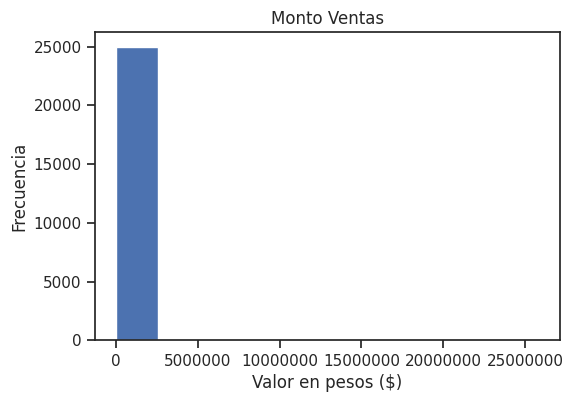

In [12]:
#Frecuencia del monto de ventas por intervalo
plt.figure(figsize=(6,4))
plt.hist(x = df['Monto'], bins = 10)
plt.ticklabel_format(useOffset=False, style='plain') #quitar notacion científica
plt.xlabel("Valor en pesos ($)")
plt.ylabel("Frecuencia")
plt.title("Monto Ventas")

Text(0.5, 1.0, 'Monto Ventas')

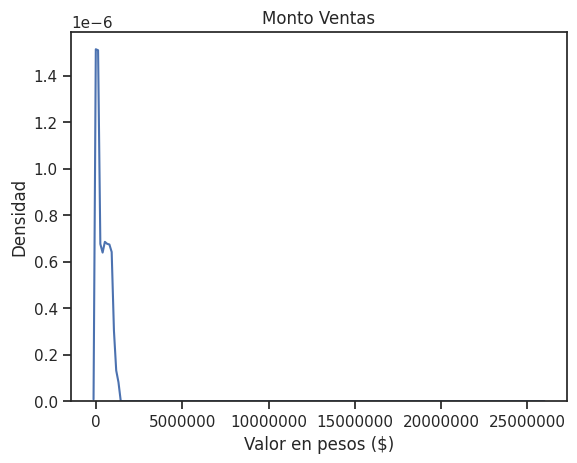

In [13]:
#Función de Densidad
kdeplot(df['Monto'])
plt.xlabel("Valor en pesos ($)")
plt.ylabel("Densidad")
plt.title("Monto Ventas")

Text(0.5, 1.0, 'Impuestos')

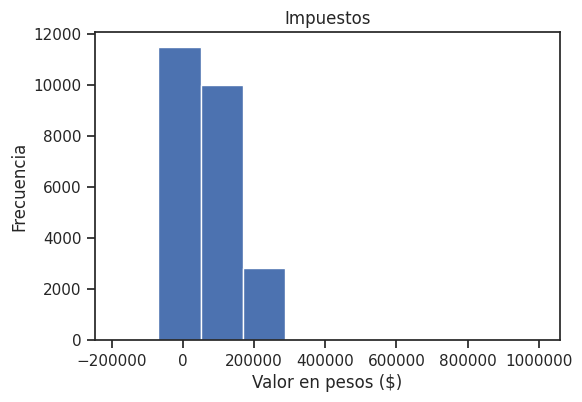

In [14]:
#Frecuencia del monto de impuestos por intervalo
plt.figure(figsize=(6,4)) #Tamaño del grafico
plt.hist(x = df['Impuestos'], bins = 10) #Grafico de histograma
plt.xlabel("Valor en pesos ($)") #Titulo eje x
plt.ylabel("Frecuencia") #Titulo eje Y
plt.title("Impuestos") #Titulo del grafico

Text(0.5, 1.0, 'Impuestos')

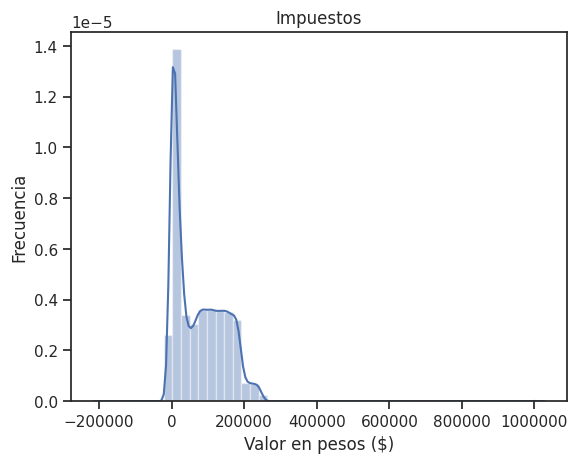

In [15]:
#Histograma + Función de densidad
sb.distplot(df['Impuestos'])
plt.xlabel("Valor en pesos ($)")
plt.ylabel("Frecuencia")
plt.title("Impuestos")

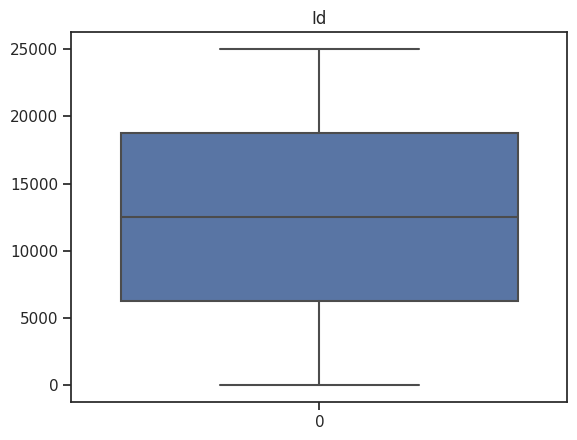

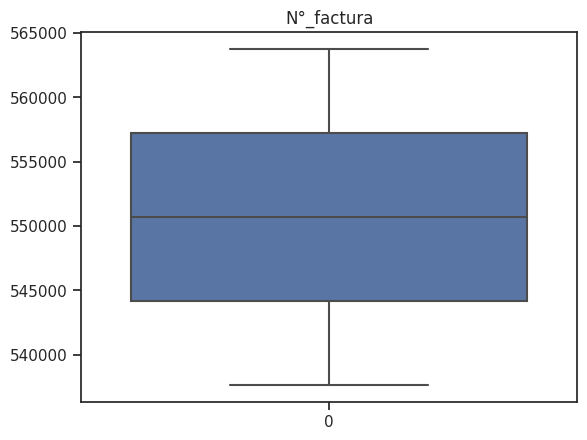

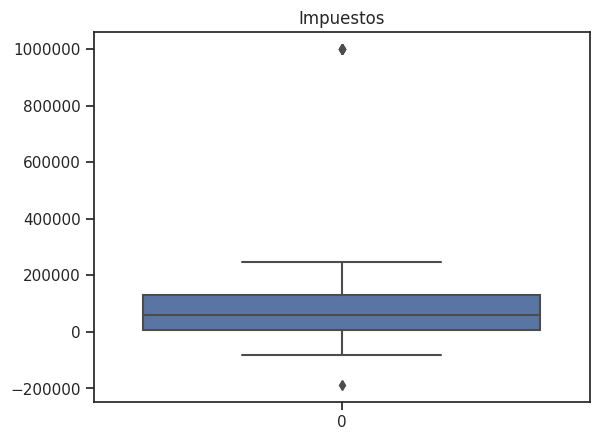

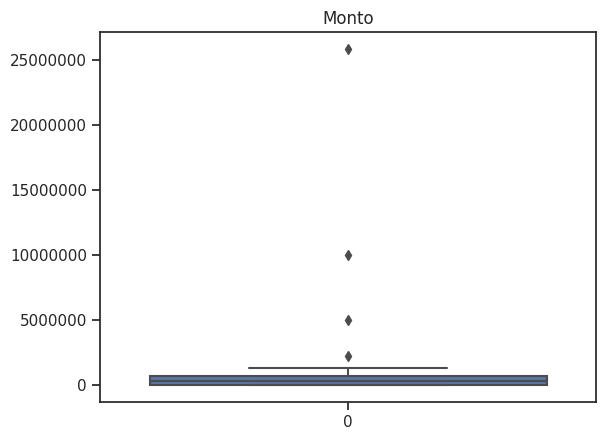

In [16]:
# Diagrama de caja y bigotes
num_vars = df.select_dtypes(include=['float64', 'int64'])
for col in num_vars.columns:
    plt.figure()
    plt.title(col)
    sb.boxplot(num_vars[col])
    plt.show()

Se calcula la proporción de las clases de las variables categóricas (cualitativas) a través de la frecuencia (cantidad) de cada clase.

In [17]:
#Cantidad de productos vendidos
df.groupby('Producto').size().sort_values(ascending=False)

Producto
Smartphone    8270
Audífonos     6136
Tablet        4545
Notebook      4032
Cargador      1848
0                9
dtype: int64

In [18]:
#Cantidad de ventas por medio de pago
print(df.groupby('Medio_pago').size())

Medio_pago
0               5
Credito       599
Crédito     14230
Debito        260
Débito       6500
Efectivo     3200
dtype: int64


In [19]:
#Cantidad de ventas por ciudad
df.groupby('Ciudad').size().sort_values(ascending=False)

Ciudad
Santiago        9777
Concepción      2721
Rancagua        2156
Valparaíso      2016
Chillán         1426
Arica           1295
Osorno           943
Los Ángeles      912
Copiapó          649
La Serena        563
Puerto Montt     546
Antofagasta      450
Buin             374
Temuco           250
Iquique          177
Ovalle           168
Linares          162
Villarrica       138
Talca            133
Calama            97
0                  3
dtype: int64

In [20]:
#Cantidad de ventas por region
df.groupby('Region').size().sort_values(ascending=False)

Region
Metropolitana         9973
Biobío                3640
O'Higgins             2116
Valparaíso            1976
Los Lagos             1450
Ñuble                 1397
Arica y Parinacota    1269
Coquimbo               697
Atacama                639
Antofagasta            540
Maule                  284
Araucanía              247
Tarapacá               173
0                        4
dtype: int64

In [21]:
#Cantidad de ventas mensuales
df.groupby('Mes').size().sort_values(ascending=False)

Mes
diciembre     8258
agosto        2625
noviembre     2220
marzo         1927
enero         1736
abril         1679
mayo          1545
julio         1222
febrero       1220
octubre       1112
junio          826
septiembre     583
0                3
1                1
dtype: int64

#**3. LIMPIEZA**

##**3.1. Eliminación**

Se eliminan todas las variables que no aporten información al estudio:

In [22]:
df = df.drop(columns=['Id','N°_factura'])
list(df.columns.values)

['Mes', 'Ciudad', 'Region', 'Medio_pago', 'Producto', 'Impuestos', 'Monto']

Se eliminan todos los registros que no aportan al estudio:

In [23]:
#Clases unicas de producto
df['Mes'].unique()

array([1, 'enero', nan, 0, 'febrero', 'marzo', 'abril', 'mayo', 'junio',
       'julio', 'agosto', 'septiembre', 'octubre', 'noviembre',
       'diciembre'], dtype=object)

In [24]:
# Eliminar las filas donde df['Mes'] sea igual a 0 o 1
df = df.drop(df[(df['Mes'] == 0) | (df['Mes'] == 1)].index)
df['Mes'].unique()

array(['enero', nan, 'febrero', 'marzo', 'abril', 'mayo', 'junio',
       'julio', 'agosto', 'septiembre', 'octubre', 'noviembre',
       'diciembre'], dtype=object)

In [25]:
# Filtrar filar distintas de cero
df = df[df['Producto'] != 0]
df = df[df['Region'] != 0]
df = df[df['Region'] != '']
df = df[df['Ciudad'] != 0]
df = df[df['Ciudad'] != '']
df = df[df['Ciudad'] != '0']
df = df[df['Medio_pago'] != 0]

print(df['Producto'].unique())
print(df['Region'].unique())
print(df['Ciudad'].unique())
print(df['Medio_pago'].unique())

['Smartphone' 'Cargador' 'Tablet' 'Audífonos' 'Notebook' nan]
['Valparaíso' 'Coquimbo' 'Biobío' nan 'Ñuble' 'Atacama' "O'Higgins"
 'Los Lagos' 'Antofagasta' 'Maule' 'Arica y Parinacota' 'Tarapacá'
 'Metropolitana' 'Araucanía']
['Valparaíso' 'Ovalle' 'Concepción' 'Buin' 'Puerto Montt' 'Arica'
 'Los Ángeles' 'Chillán' 'Copiapó' 'Rancagua' nan 'Antofagasta' 'Talca'
 'La Serena' 'Temuco' 'Iquique' 'Linares' 'Osorno' 'Santiago' 'Villarrica'
 'Calama']
[nan 'Crédito' 'Credito' 'Débito' 'Debito' 'Efectivo']


##**3.2. Datos nulos (missing)**

Identificacion de datos nulos.

In [26]:
#Datos nulos
df.isna().sum()

Mes            25
Ciudad         26
Region        575
Medio_pago    189
Producto      143
Impuestos     700
Monto          12
dtype: int64

Eliminación de registros con menor cantidad de nulos (menos del 10% de los registros):

In [27]:
# Eliminar filas con datos nulos
df = df.dropna(subset=['Mes','Ciudad','Monto'])

In [28]:
#Datos nulos
df.isna().sum()

Mes             0
Ciudad          0
Region        557
Medio_pago    175
Producto      133
Impuestos     691
Monto           0
dtype: int64

Imputación de datos faltantes de las variables con mayor cantidad de nulos (más del 10% de los registros).

In [29]:
# Unificar clases de la columna 'Medio_pago'
df['Medio_pago'] = df['Medio_pago'].replace({'Crédito': 'Credito', 'Débito': 'Debito'})
df['Medio_pago'].unique()

array([nan, 'Credito', 'Debito', 'Efectivo'], dtype=object)

In [30]:
#Imputacion por moda
mode_value = df['Producto'].mode()[0]
df['Producto'] = df['Producto'].fillna(mode_value)

mode_value = df['Medio_pago'].mode()[0]
df['Medio_pago'] = df['Medio_pago'].fillna(mode_value)

In [31]:
# Calcula el 19% de la columna 'Monto' y llena los valores faltantes en 'Impuestos'
df['Impuestos'] = df['Impuestos'].fillna(df['Monto'] * 0.19)

In [32]:
# Función para asignar la región en función de la ciudad
def asignar_region(ciudad):
    mapeo_ciudad_region = {
        'Santiago': 'Metropolitana',
        'Concepción': 'Biobío',
        'Rancagua': "O'Higgins",
        'Valparaíso': 'Valparaíso',
        'Chillán': 'Ñuble',
        'Arica': 'Arica y Parinacota',
        'Osorno': 'Los Lagos',
        'Los Ángeles': 'Biobío',
        'Copiapó': 'Atacama',
        'La Serena': 'Coquimbo',
        'Puerto Montt': 'Los Lagos',
        'Antofagasta': 'Antofagasta',
        'Buin': 'Metropolitana',
        'Temuco': 'Araucanía',
        'Iquique': 'Tarapacá',
        'Ovalle': 'Coquimbo',
        'Linares': 'Maule',
        'Villarrica': 'Biobío',
        'Talca': 'Maule',
        'Calama': 'Antofagasta'
    }
    return mapeo_ciudad_region.get(ciudad, '')

# Aplicar la función y asignar valores a la columna 'Region'
df['Region'] = df['Ciudad'].apply(asignar_region)

In [33]:
#Datos nulos
df.isna().sum()

Mes           0
Ciudad        0
Region        0
Medio_pago    0
Producto      0
Impuestos     0
Monto         0
dtype: int64

##**3.3. Datos atípicos (outliers)**

Se calcula el rango de datos que se considera normal:

In [34]:
# Calcular el rango intercuartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

Se eliminan todos los datos que están fuera del rango normal, es decir, que estadísticamente se consideran datos atípicos:

In [35]:
# Remover los registros con valores fuera del rango Q1 - 1.5 x IQR hasta Q3 + 1.5 x IQR
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)].dropna()

---
⚠️ **NOTA** ⚠️

> Es importante revisar el comportamiento de las variables antes de este paso, ya que en otros casos puede que hayan datos que no sean realmente atípicos pero por su naturaleza queden fuera del rango normal, por lo que no sería necesario realizar ninguna modificación. En otros casos hay que hacer un filtro para eliminar sólo los datos de las variables que correspondan. Por otro lado, cuando hay demasiados datos atípicos (más de un 10-20% de los registros) es mejor imputar los datos en vez de eliminarlos.
---

In [36]:
# Generar el resumen estadístico y formatear los montos
resumen_estadistico = df.describe()
resumen_estadistico['Impuestos'] = resumen_estadistico['Impuestos'].apply('{:.0f}'.format)
resumen_estadistico['Monto'] = resumen_estadistico['Monto'].apply('{:.0f}'.format)
resumen_estadistico

,Impuestos,Monto
count,24903,24903
mean,73855,390728
std,67325,353134
min,-80615,0
25%,6024,31833
50%,59211,311858
75%,130108,684874
max,246720,1298524


Aun existen datos ilógicos en el dataset, los cuales hay que filtrar de forma manual:

In [37]:
# Filtrar Impuestos por sobre el valor de Q1
df = df[df['Impuestos'] >= 6024]
# Filtrar Montos por sobre el valor de Q1
df = df[df['Monto'] >= 31833]

In [38]:
# Generar el resumen estadístico y formatear los montos
resumen_estadistico = df.describe()
resumen_estadistico['Impuestos'] = resumen_estadistico['Impuestos'].apply('{:.0f}'.format)
resumen_estadistico['Monto'] = resumen_estadistico['Monto'].apply('{:.0f}'.format)
resumen_estadistico

,Impuestos,Monto
count,18664,18664
mean,97365,514951
std,61924,323261
min,6057,31880
25%,37410,217698
50%,95212,501112
75%,148065,779290
max,246720,1298524


In [39]:
# Transformar en números enteros
df['Impuestos'] = df['Impuestos'].astype(int)
df['Monto'] = df['Monto'].astype(int)

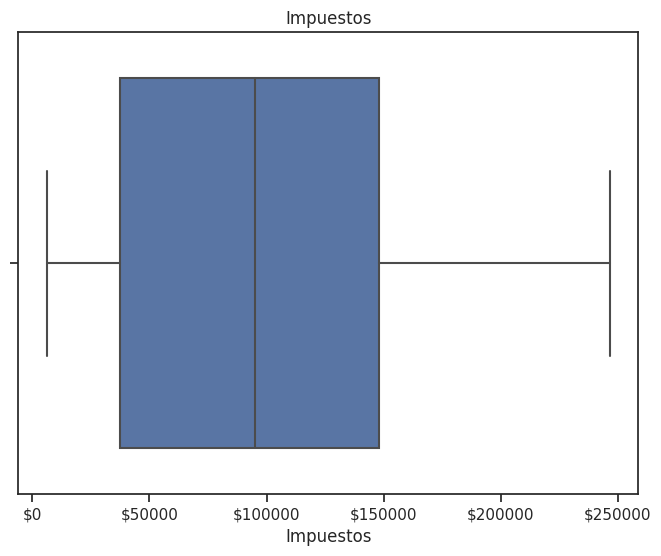

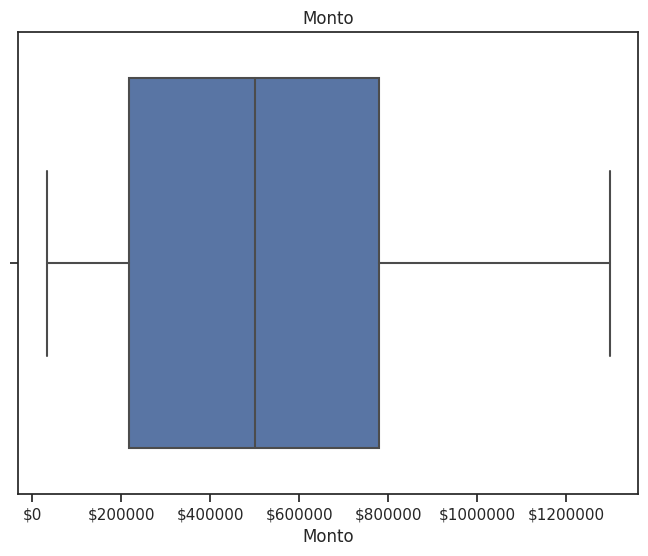

In [40]:
# Seleccionar las variables numéricas
num_vars = df.select_dtypes(include=['float64', 'int64'])

# Crear boxplots para cada variable numérica
for col in num_vars.columns:
    plt.figure(figsize=(8, 6))  # Tamaño de la figura
    ax = sb.boxplot(x=num_vars[col])  # Crear el boxplot y obtener el eje y
    ax.xaxis.set_major_formatter('${:.0f}'.format)  # Formatear el eje y como moneda
    plt.title(f'{col}')  # Título del gráfico
    plt.xlabel(col)  # Etiqueta del eje x
    plt.show()  # Mostrar el gráfico

#**4. ANÁLISIS**

##**4.1. Resumen**

In [41]:
df.head()

,Mes,Ciudad,Region,Medio_pago,Producto,Impuestos,Monto
1,enero,Valparaíso,Valparaíso,Credito,Smartphone,163293,859437
2,enero,Ovalle,Coquimbo,Credito,Cargador,14654,77130
4,enero,Concepción,Biobío,Credito,Tablet,109947,578670
5,enero,Buin,Metropolitana,Credito,Smartphone,135666,714031
6,enero,Concepción,Biobío,Debito,Smartphone,43797,230513


Agrupación de datos en tablas para resumir información del dataset:

In [42]:
# Función lambda para indicar el formato de moneda
moneda = lambda x: "${:,.0f}".format(x).replace(",", ".")

In [43]:
#Calculo del promedio de venta de cada producto
grupo_producto = df[["Producto","Monto"]].groupby(by="Producto") #Agrupar datos
promedio_producto = grupo_producto.agg("mean") #Calculo de  media
producto_orden = promedio_producto.sort_values(by="Monto", ascending=False) #Orden descendente
producto_orden["Monto"] = producto_orden["Monto"].apply(moneda)
producto_orden

,Monto
Producto,
Notebook,$826.574
Smartphone,$506.794
Tablet,$432.569
Cargador,$66.009


In [44]:
#Calculo de la suma de las ventas por region
grupo = df[["Region","Monto"]].groupby(by="Region")
suma = grupo.agg("sum") # Cálculo de la suma total
orden = suma.sort_values(by="Monto", ascending=False)
orden["Monto"] = orden["Monto"].apply(moneda)
orden

,Monto
Region,
Metropolitana,$3.927.916.909
Biobío,$1.445.420.464
O'Higgins,$822.234.880
Valparaíso,$781.743.879
Los Lagos,$575.807.008
Ñuble,$549.538.284
Arica y Parinacota,$511.766.589
Coquimbo,$269.857.046
Atacama,$243.589.748


In [45]:
#Calculo de la suma de las ventas mensuales
grupo_mes = df[["Mes","Monto"]].groupby(by="Mes")
suma_mes = grupo_mes.agg("sum") # Cálculo de la suma total
mes_orden = suma_mes.sort_values(by="Monto", ascending=False)
mes_orden["Monto"] = mes_orden["Monto"].apply(moneda)
mes_orden

,Monto
Mes,
diciembre,$3.177.076.427
agosto,$1.029.127.483
noviembre,$854.506.126
marzo,$720.297.556
enero,$651.754.111
abril,$636.773.489
mayo,$600.252.834
julio,$478.961.351
febrero,$476.754.056


In [48]:
#Calculo de la suma de las ventas por medio de pago
grupo = df[["Medio_pago","Monto","Impuestos"]].groupby(by="Medio_pago") #Agrupar datos
promedio = grupo.agg("sum") #Calculo de  media
orden = promedio.sort_values(by="Monto", ascending=False) #Orden descendente
orden["Monto"] = orden["Monto"].apply(moneda)
orden["Impuestos"] = orden["Impuestos"].apply(moneda)
orden

,Monto,Impuestos
Medio_pago,,
Credito,$7.891.893.030,$1.497.373.689
Debito,$1.590.846.242,$299.431.193
Efectivo,$128.306.903,$20.408.065


In [53]:
# Cantidad de ventas por sobre el millón de pesos
ventas = len(df[df['Monto'] > 1000000])
# Total de registros en el DataFrame
total_registros = len(df)
# Calcular el ratio en porcentaje
ratio = (ventas / total_registros) * 100
print(f"El ratio de ventas por sobre el millón de pesos es: {ratio:.2f}%")

El ratio de ventas por sobre el millón de pesos es: 5.42%


In [52]:
# Cantidad de ventas bajo $500.000 pesos
ventas = len(df[df['Monto'] < 500000])
# Total de registros en el DataFrame
total_registros = len(df)
# Calcular el ratio en porcentaje
ratio = (ventas / total_registros) * 100
print(f"El ratio de ventas bajo $500.000: {ratio:.2f}%")

El ratio de ventas bajo $500.000: 49.89%


In [49]:
#Conteo de cantidad de ventas por medio de pago
tc = len(df[(df.Medio_pago == "Credito")])
td = len(df[(df.Medio_pago == "Debito")])
ef = len(df[(df.Medio_pago == "Efectivo")])

print(f"Cantidad de ventas en Crédito: {tc}")
print(f"Cantidad de ventas en Débito: {td}")
print(f"Cantidad de ventas en Efectivo: {ef}")

Cantidad de ventas en Crédito: 12840
Cantidad de ventas en Débito: 4648
Cantidad de ventas en Efectivo: 1176


##**4.2. Estadísticas**

**Variables numéricas**

In [54]:
# Generar el resumen estadístico y formatear los montos
resumen_estadistico = df.describe()
resumen_estadistico['Impuestos'] = resumen_estadistico['Impuestos'].apply('{:.0f}'.format)
resumen_estadistico['Monto'] = resumen_estadistico['Monto'].apply('{:.0f}'.format)
resumen_estadistico

,Impuestos,Monto
count,18664,18664
mean,97365,514951
std,61924,323261
min,6057,31880
25%,37410,217698
50%,95212,501112
75%,148065,779290
max,246720,1298524


In [55]:
#Desviación Estandar
df.std().apply(lambda x: f'{x:.2f}')

Impuestos     61923.68
Monto        323261.33
dtype: object

In [56]:
#Varianza
df.var().apply(lambda x: f'{x:.2f}')

Impuestos      3834542411.28
Monto        104497890134.51
dtype: object

In [57]:
#Moda
df.mode().iloc[0]

Mes               diciembre
Ciudad             Santiago
Region        Metropolitana
Medio_pago          Credito
Producto         Smartphone
Impuestos             47498
Monto                249990
Name: 0, dtype: object

Text(0.5, 1.0, 'Impuestos por Venta')

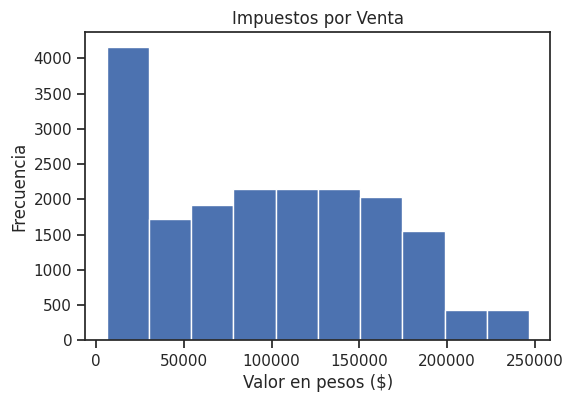

In [58]:
#Frecuencia del monto de impuestos por intervalo
plt.figure(figsize=(6,4)) #Tamaño del grafico
plt.hist(x = df['Impuestos'], bins = 10) #Grafico de histograma
plt.xlabel("Valor en pesos ($)") #Titulo eje x
plt.ylabel("Frecuencia") #Titulo eje Y
plt.title("Impuestos por Venta") #Titulo del grafico

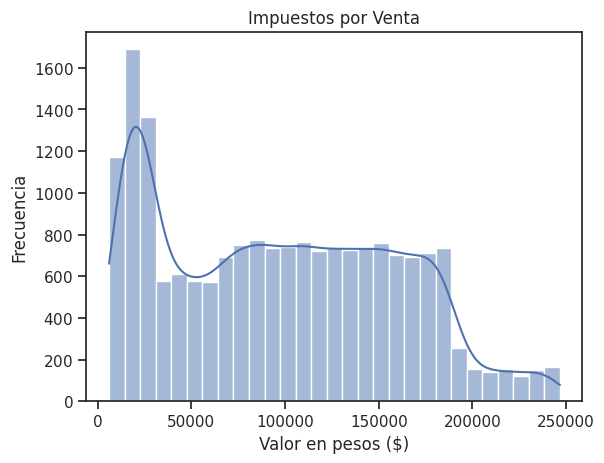

In [59]:
# Crea el histograma con función de densidad
ax = sb.histplot(df['Impuestos'], kde=True)
# Configura el formato del eje Y para mostrar los valores completos
ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True, useOffset=False))
plt.xlabel("Valor en pesos ($)")
plt.ylabel("Frecuencia")
plt.title("Impuestos por Venta")
plt.show()


Text(0.5, 1.0, 'Monto de Ventas')

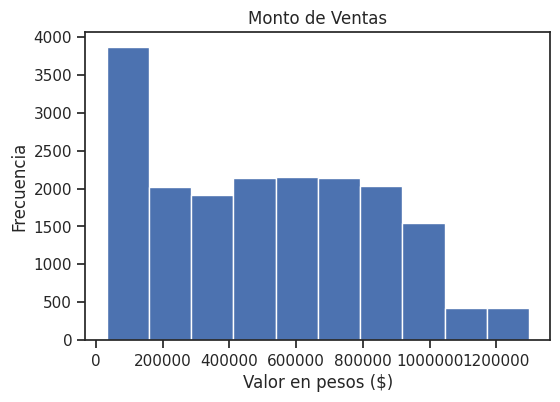

In [60]:
#Frecuencia del monto de ventas por intervalo
plt.figure(figsize=(6,4))
plt.hist(x = df['Monto'], bins = 10)
plt.ticklabel_format(useOffset=False, style='plain') #quitar notacion científica
plt.xlabel("Valor en pesos ($)")
plt.ylabel("Frecuencia")
plt.title("Monto de Ventas")

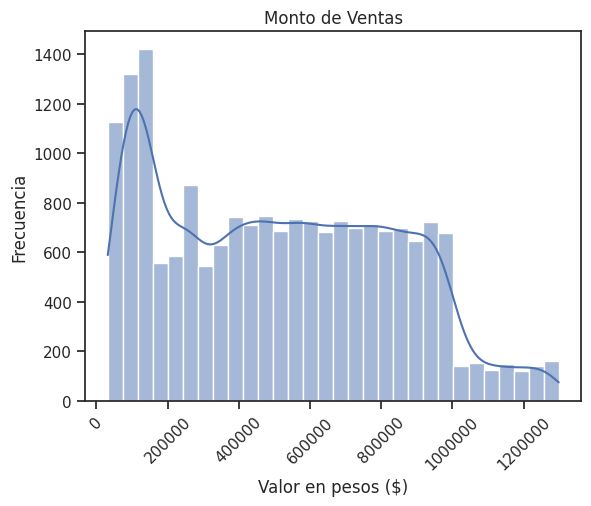

In [61]:
# Crea el histograma con función de densidad
sb.histplot(df['Monto'], kde=True)
# Configura el formato del eje X para mostrar los valores completos en pesos ($)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Valor en pesos ($)")
plt.ylabel("Frecuencia")
plt.title("Monto de Ventas")
plt.show()


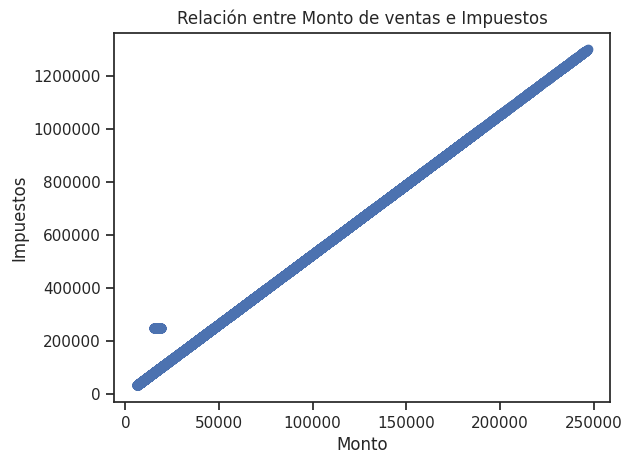

In [63]:
#Diagrama de Dispersión
fig, ax = plt.subplots()
ax.scatter(df.Impuestos, df.Monto)
plt.xlabel("Monto")
plt.ylabel("Impuestos")
plt.title("Relación entre Monto de ventas e Impuestos")
plt.show()

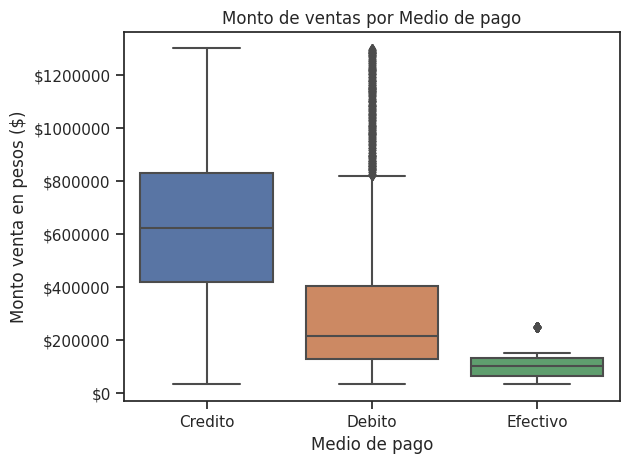

In [71]:
# Crea el boxplot
ax = sb.boxplot(x="Medio_pago", y="Monto", data=df)
# Configura el formato del eje Y para mostrar los valores completos en pesos ($)
ax.set(yticklabels=['${:.0f}'.format(val) for val in ax.get_yticks()])
# Titulos
plt.xlabel("Medio de pago")
plt.ylabel("Monto venta en pesos ($)")
plt.title("Monto de ventas por Medio de pago")
plt.show()

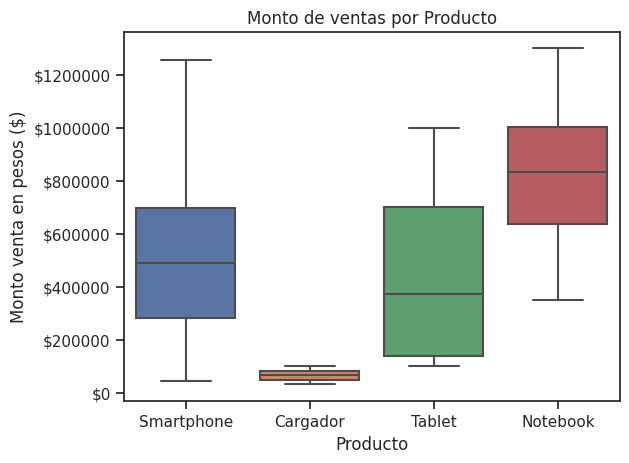

In [72]:
# Crea el boxplot
ax = sb.boxplot(x="Producto", y="Monto", data=df)
# Configura el formato del eje Y para mostrar los valores completos en pesos ($)
ax.set(yticklabels=['${:.0f}'.format(val) for val in ax.get_yticks()])
# Titulos
plt.xlabel("Producto")
plt.ylabel("Monto venta en pesos ($)")
plt.title("Monto de ventas por Producto")
plt.show()


**Variables categóricas**

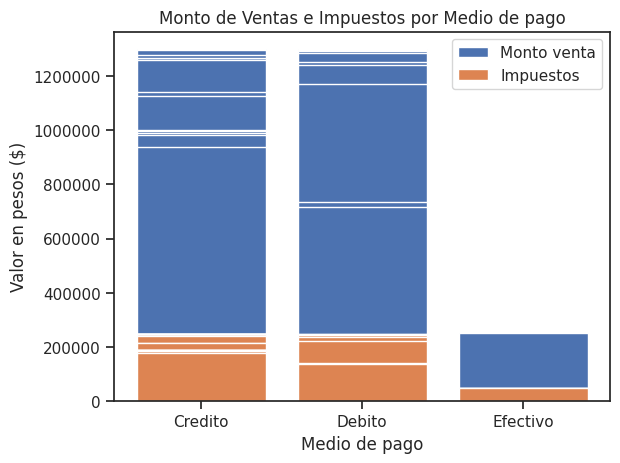

In [73]:
#Gráfico de barras apiladas
fig, ax = plt.subplots()
ax.bar(df['Medio_pago'],df['Monto'], label='Monto venta')
ax.bar(df['Medio_pago'],df['Impuestos'],label='Impuestos')
ax.set_xlabel('Medio de pago')
ax.set_ylabel('Valor en pesos ($)')
ax.set_title('Monto de Ventas e Impuestos por Medio de pago')
ax.legend()

plt.show()

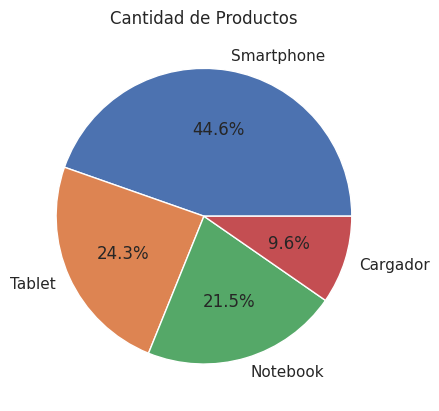

In [74]:
#Cantidad de productos vendidos
frecuencia = df['Producto'].value_counts()
plt.pie(frecuencia, labels=frecuencia.index, autopct='%1.1f%%')
plt.title("Cantidad de Productos")
plt.show()

Text(0.5, 1.0, 'Cantidad de Ventas mensuales')

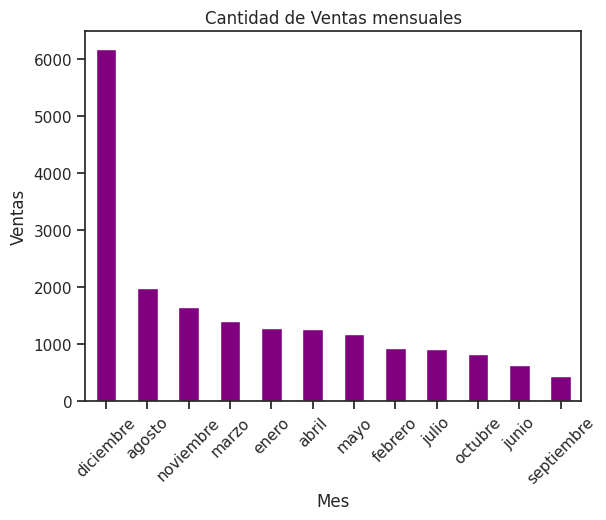

In [75]:
#Cantidad de ventas mensuales
df['Mes'].value_counts().plot.bar(rot=45, color='purple')
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.title("Cantidad de Ventas mensuales")

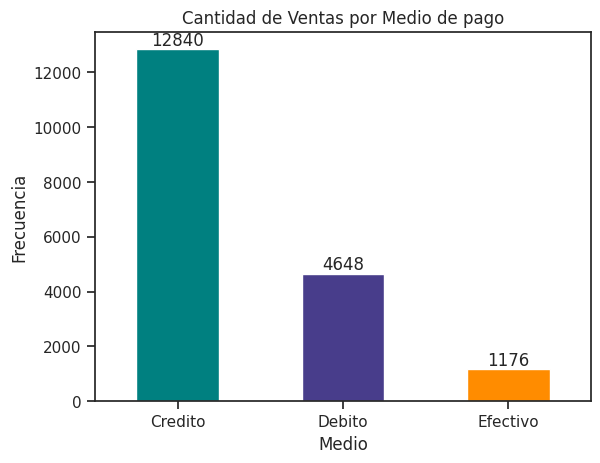

In [76]:
# Cantidad de ventas por medio de pago
medio_pago_counts = df['Medio_pago'].value_counts()
colores = ['teal', 'darkslateblue', 'darkorange']  # Lista de colores, uno por cada barra
ax = medio_pago_counts.plot.bar(rot=0, color=colores)  # Asigna colores a cada barra

# Agrega etiquetas de valor en la parte superior de cada barra
for i, v in enumerate(medio_pago_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.xlabel("Medio")
plt.ylabel("Frecuencia")
plt.title("Cantidad de Ventas por Medio de pago")

plt.show()


Text(0.5, 1.0, 'Cantidad de Ventas por Ciudad')

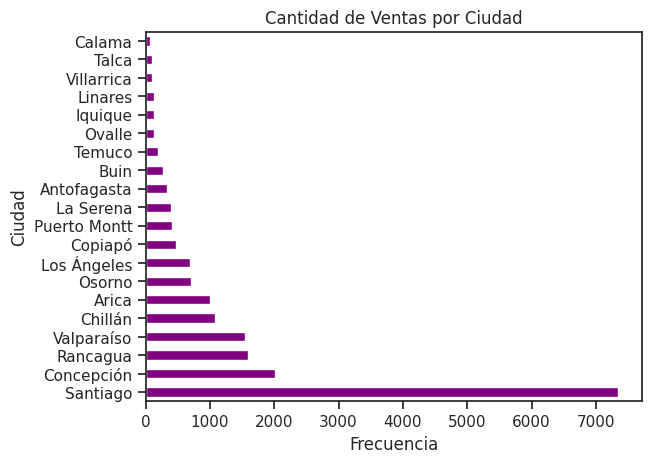

In [77]:
#Cantidad de ventas por ciudad
df['Ciudad'].value_counts(sort=True).plot.barh(color="purple")#Gráfico de barras horizontal
plt.xlabel("Frecuencia")
plt.ylabel("Ciudad")
plt.title("Cantidad de Ventas por Ciudad")

Text(0.5, 1.0, 'Cantidad de Ventas por Region')

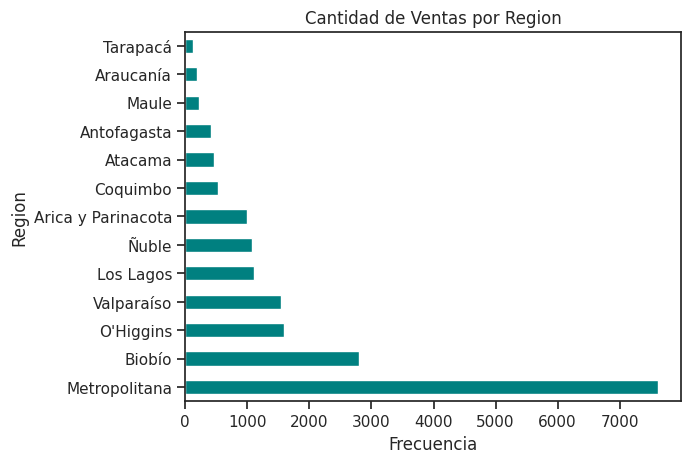

In [78]:
#Cantidad de ventas por region
df['Region'].value_counts(sort=True).plot.barh(color="teal")#Gráfico de barras horizontal
plt.xlabel("Frecuencia")
plt.ylabel("Region")
plt.title("Cantidad de Ventas por Region")

#**5. TRANSFORMACIÓN**

Antes de poder realizar modelos predictivos, es necesario transformar las variables categóricas asignando etiquetas numéricas a las clases de cada variable. Algunos métodos para lograr esto son:

➡️ `Reemplazo`: Para variables con pocas clases (por lo general binarias) o donde sea importante controlar la etiqueta numérica de la clase ya sea porque son ordinales o por alguna razón lógica, se recomienda hacer el reemplazo de forma manual.

In [79]:
#Reemplazar valores manualmente

# Etiquetas de Medio de Pago
df['Medio_pago'].replace({
    "Efectivo":0,"Debito":1, "Credito":2
    }, inplace=True)

# Etiquetas de Mes
df['Mes'].replace({
    "enero":1,"febrero":2, "marzo":3, "abril":4,"mayo":5,"junio":6, "julio":7,
    "agosto":8,"septiembre":9,"octubre":10,"noviembre":11,"diciembre":12
    }, inplace=True)

➡️ `Label Encoding`: Creación de etiquetas numéricas dentro de la misma columna. Sólo sirve para variables categóricas nominales ya que las etiquetas perderían el orden para variables categoricas ordinales. Se recomienda para variables con muchas clases.

In [80]:
from sklearn.preprocessing import LabelEncoder
#Selecciona las columnas categóricas que se van a codificar
categorical_cols = ['Producto','Ciudad','Region']

#Itera sobre las columnas categóricas y aplica LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#Muestra los valores originales y los valores codificados
for col in categorical_cols:
    original_values = df[col]
    encoded_values = df[col]
    le = label_encoders[col]

    unique_values = original_values.unique()
    unique_encoded_values = le.inverse_transform(unique_values)

    mapping = dict(zip(unique_values, unique_encoded_values))
    print(f"Columna: {col}")
    print("Valor Codificado - Clase")
    for value, encoded_value in mapping.items():
        print(f"{value} - {encoded_value}")
    print("------------------------")


Columna: Producto
Valor Codificado - Clase
2 - Smartphone
0 - Cargador
3 - Tablet
1 - Notebook
------------------------
Columna: Ciudad
Valor Codificado - Clase
18 - Valparaíso
12 - Ovalle
5 - Concepción
2 - Buin
13 - Puerto Montt
1 - Arica
10 - Los Ángeles
4 - Chillán
6 - Copiapó
14 - Rancagua
0 - Antofagasta
16 - Talca
8 - La Serena
17 - Temuco
7 - Iquique
11 - Osorno
15 - Santiago
9 - Linares
19 - Villarrica
3 - Calama
------------------------
Columna: Region
Valor Codificado - Clase
11 - Valparaíso
5 - Coquimbo
4 - Biobío
8 - Metropolitana
6 - Los Lagos
2 - Arica y Parinacota
12 - Ñuble
3 - Atacama
9 - O'Higgins
0 - Antofagasta
7 - Maule
1 - Araucanía
10 - Tarapacá
------------------------


In [81]:
df.head()

,Mes,Ciudad,Region,Medio_pago,Producto,Impuestos,Monto
1,1,18,11,2,2,163293,859437
2,1,12,5,2,0,14654,77130
4,1,5,4,2,3,109947,578670
5,1,2,8,2,2,135666,714031
6,1,5,4,1,2,43797,230513


In [82]:
df.tail()

,Mes,Ciudad,Region,Medio_pago,Producto,Impuestos,Monto
24973,12,18,11,2,2,176884,930973
24975,12,18,11,2,2,101643,534965
24977,12,18,11,1,1,135974,715653
24978,12,14,9,2,2,59177,311461
24979,12,18,11,2,2,178316,938508


In [83]:
df.sample(10)

,Mes,Ciudad,Region,Medio_pago,Producto,Impuestos,Monto
21529,12,6,3,2,2,93764,493493
11798,8,5,4,1,1,212324,1117493
21208,12,18,11,2,3,167943,883909
3287,3,15,8,2,2,121513,639540
21513,12,8,5,2,1,200077,1053038
12190,8,18,11,1,1,185705,977396
20799,12,14,9,0,0,12005,63184
20549,12,15,8,1,2,25809,135835
2826,2,11,6,2,1,76952,405012
16943,12,15,8,2,1,99795,525237


Ahora el conjunto de datos está listo para realizar modelos predictivos.

---
---
# **BIBLIOGRAFÍA**

Numpy: https://numpy.org/devdocs/user/index.html#user

Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib: https://matplotlib.org/stable/users/index.html

Seaborn: https://seaborn.pydata.org/tutorial.html

Lista de colores: https://matplotlib.org/stable/gallery/color/named_colors.html